In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from dchisq import DChiSq

In [172]:
dx2 = DChiSq(0.3, 0.1, 5000, 500)
p = dx2.nPDF(np.linspace(1200, 1800, 200))

In [177]:
c = dx2.nCDF(np.linspace(1200, 1800, 200))

In [164]:
# Compare to Monte Carlo
n_samples = int(1e7)
samples = np.zeros(n_samples)
for i in range(n_samples):
    
    samples[i] = 0.3 * np.random.chisquare(5000) - 0.1 * np.random.chisquare(500)

In [165]:
np.mean(samples)

1449.9975674139332

(array([3.04989262e-07, 2.77509107e-05, 6.41526241e-04, 4.75141527e-03,
        1.17812497e-02, 1.02700435e-02, 3.24918443e-03, 3.82525002e-04,
        1.70202681e-05, 3.32998480e-07]),
 array([1293.15232777, 1325.28460654, 1357.41688531, 1389.54916408,
        1421.68144285, 1453.81372162, 1485.94600038, 1518.07827915,
        1550.21055792, 1582.34283669, 1614.47511546]),
 <a list of 10 Patch objects>)

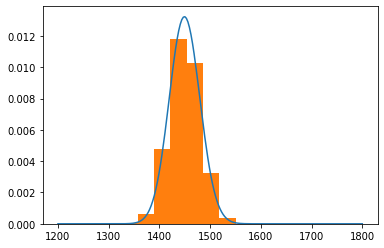

In [176]:
plt.plot(np.linspace(1200, 1800, 200), p)
plt.hist(samples, density=True)

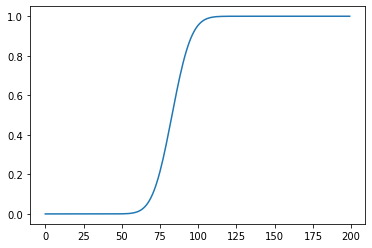

In [178]:
plt.plot(c)

In [184]:
# Concentration of measure phenomenon, logarithmic scaling:

p = np.logspace(2, 5, 10)
T = np.log(p)
n = p

n_samples = 200

pdfs = np.zeros((p.size, n_samples))
means = np.zeros(p.size)
variances = np.zeros(p.size)
    
for i, p_ in enumerate(p):
    
    dx2 = DChiSq(0.5, 0.5, n[i] - T[i], T[i])
    means[i] = dx2.mean()
    variances[i] = dx2.variance()    
    
    domain = np.linspace(dx2.mean() - np.sqrt(dx2.variance()), dx2.mean() + np.sqrt(dx2.variance()), n_samples)
    pdfs[i, :] = dx2.nPDF(domain)
    

In [187]:
variances

array([5.49136783e+01, 1.41080865e+02, 3.51542310e+02, 8.57504774e+02,
       2.05962342e+03, 4.88959761e+03, 1.15023217e+04, 2.68583884e+04,
       6.23302110e+04, 1.43895000e+05])

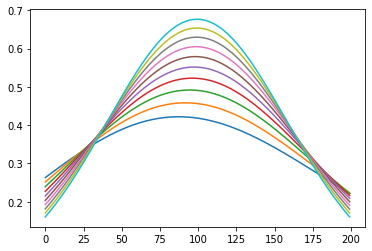

In [188]:
# Plot the Z-scored PDFs ??:
for i in range(pdfs.shape[0]):
    
    plt.plot(pdfs[i, :] * np.sqrt(variances[i]))
    

In [38]:
from scipy import stats

In [48]:
# Exponential tail bounds: Evaluate the PDF far from the mean relative to a Gaussian and an exponential with 
# the same variance. Does our distribution fall somewhere in the middle?

alpha = 0.33
beta = 2

m = 1000
n = 100

mean = alpha * m - beta * n
variance = 2 * (m * alpha**2 + n * beta**2)

dx2 = DChiSq(alpha, beta, m, n)

domain = np.linspace(mean - 5 * variance, mean - 3 * variance, 200)
#p1 = dx2.nPDF(domain)

p2 = stats.norm.pdf(domain, loc= mean, scale = np.sqrt(variance))
p3 = stats.laplace.pdf(domain, loc = mean, scale = np.sqrt(variance))

In [73]:
mean

130.0

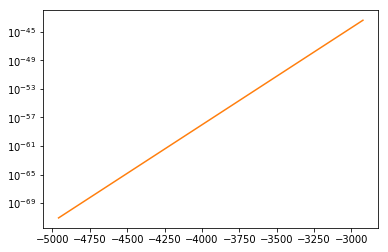

In [51]:
plt.plot(domain, p2)
plt.plot(domain, p3)
plt.yscale('log')

In [54]:
import mpmath as mp

In [64]:
# Plot the characteristic function so we know what we are dealing with

char_fn = list(map(dx2.char_fn, np.linspace(-1, 1, 1000)))

In [65]:
char_fn

[mpc(real='6.6663577316501231e-71', imag='6.85091486485076e-71'),
 mpc(real='4.6767681804640708e-71', imag='1.3440151303232242e-70'),
 mpc(real='-2.1672111194494931e-71', imag='2.1072444214194872e-70'),
 mpc(real='-1.6219727249531928e-70', imag='2.7039847688656245e-70'),
 mpc(real='-3.8938973825247933e-70', imag='2.6196097339946073e-70'),
 mpc(real='-6.9024312630124931e-70', imag='1.0675097315627972e-70'),
 mpc(real='-9.9723712768147385e-70', imag='-2.9301834928995532e-70'),
 mpc(real='-1.1571720608962305e-69', imag='-1.0261998666559468e-69'),
 mpc(real='-9.0706192486365968e-70', imag='-2.1149855075913458e-69'),
 mpc(real='1.2147403552445771e-70', imag='-3.4216956688889755e-69'),
 mpc(real='2.3366838498023499e-69', imag='-4.5259917331188907e-69'),
 mpc(real='6.0198193913978367e-69', imag='-4.6014215934785795e-69'),
 mpc(real='1.1021341502620838e-68', imag='-2.3560787585321861e-69'),
 mpc(real='1.6313898994656927e-68', imag='3.8524748205319815e-69'),
 mpc(real='1.9464494683817253e-68', 

In [81]:
x = list(map(lambda t: mp.fabs(dx2.char_fn(t)), np.linspace(-1, 1, 1000)))

In [83]:
thresh = [xx < mp.mpf(1e-50) for xx in x]

In [84]:
thresh

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False

[autoreload of dchisq failed: Traceback (most recent call last):
  File "/home/akumar/anaconda3/envs/nse/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/akumar/anaconda3/envs/nse/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/home/akumar/anaconda3/envs/nse/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/akumar/anaconda3/envs/nse/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed


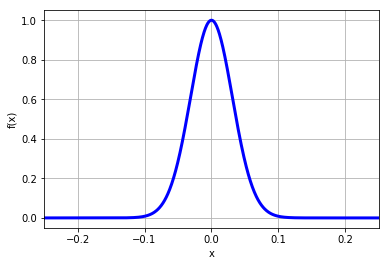

In [78]:
mp.plot(lambda t: mp.fabs(dx2.char_fn(t)), [-0.25, 0.25], points=1000)

In [ ]:
mp.abs(mp.exp(-1j * t * z) * dx2.char_fn(t))

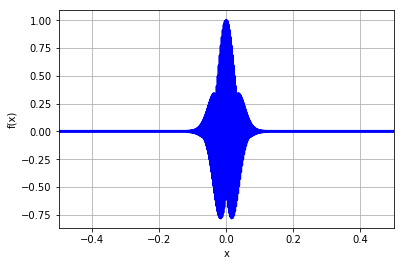

In [77]:
# Plot the integrand of the inversion formula
z = 2260
mp.plot(lambda t: mp.re(mp.exp(-1j * t * z) * dx2.char_fn(t)), [-0.5, 0.5], points=1000)

In [ ]:
plt.plot(lambda)

In [ ]:
# Precisely comparing tail bounds seems to be hopelesss